# IMPORTING PYTHON PACKAGES

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.externals import joblib
import warnings
warnings.filterwarnings('ignore')

C:\Anaconda\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


# IMPORTING DATASET

In [2]:
from sklearn import datasets
calhousing=datasets.fetch_california_housing()
df_calhousing = pd.DataFrame(calhousing.data, columns=calhousing.feature_names)
df_calhousing

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


# EXPLORATORY DATA ANALYSIS

In [3]:
df_calhousing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [4]:
df_calhousing.tail()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32
20639,2.3886,16.0,5.254717,1.162264,1387.0,2.616981,39.37,-121.24


In [5]:
df_calhousing.shape

(20640, 8)

In [6]:
df_calhousing.dtypes

MedInc        float64
HouseAge      float64
AveRooms      float64
AveBedrms     float64
Population    float64
AveOccup      float64
Latitude      float64
Longitude     float64
dtype: object

In [7]:
df_calhousing.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')

In [8]:
df_calhousing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
MedInc        20640 non-null float64
HouseAge      20640 non-null float64
AveRooms      20640 non-null float64
AveBedrms     20640 non-null float64
Population    20640 non-null float64
AveOccup      20640 non-null float64
Latitude      20640 non-null float64
Longitude     20640 non-null float64
dtypes: float64(8)
memory usage: 1.3 MB


In [9]:
df_calhousing.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


Data in all the columns appear to have normal distribution (mean very close to 50th percentile). Columns 'AveRooms', 'AveBedrms', 'Population' and 'AveOccup' have outliers.

In [10]:
#sns.heatmap(df_calhousing.isnull(),annot=True)

In [11]:
df_calhousing.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

CHECKING DATA SKEWNESS

In [12]:
df_calhousing.skew()

MedInc         1.646657
HouseAge       0.060331
AveRooms      20.697869
AveBedrms     31.316956
Population     4.935858
AveOccup      97.639561
Latitude       0.465953
Longitude     -0.297801
dtype: float64

REMOVING DATA SKEWNESS

In [13]:
for col in df_calhousing.columns:
    if df_calhousing.skew().loc[col]>0.55:
        df_calhousing[col]=np.log1p(df_calhousing[col])
df_calhousing.skew()

MedInc        0.226083
HouseAge      0.060331
AveRooms      1.390761
AveBedrms     8.988786
Population   -1.044087
AveOccup      3.879679
Latitude      0.465953
Longitude    -0.297801
dtype: float64

CHECKING OUTLIERS

In [14]:
z=np.abs(zscore(df_calhousing))
print(z.shape)
print(np.where(z>3))

(20640, 8)
(array([   50,    59,    61, ..., 20502, 20527, 20625], dtype=int64), array([2, 4, 4, ..., 4, 5, 4], dtype=int64))


REMOVING OUTLIERS

In [15]:
df_final=df_calhousing.loc[(z<3).all(axis=1)]
print(df_final.shape)

(19876, 8)


In [16]:
df_final.skew()

MedInc        0.127865
HouseAge      0.049873
AveRooms     -0.221664
AveBedrms     1.887048
Population   -0.137146
AveOccup      0.214699
Latitude      0.469818
Longitude    -0.307596
dtype: float64

BOXPLOT

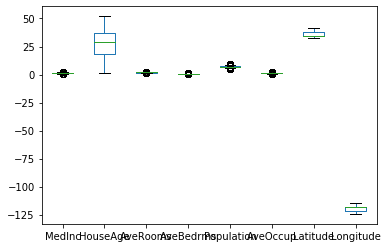

In [17]:
df_final.plot.box()

CORRELATION

In [18]:
df_final.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
MedInc,1.000000,-0.152958,0.670593,-0.222656,0.022199,-0.070865,-0.085888,-0.014271
HouseAge,-0.152958,1.000000,-0.214888,-0.122070,-0.299543,-0.019048,0.014481,-0.104873
AveRooms,0.670593,-0.214888,1.000000,0.147541,-0.071495,0.007735,0.135525,-0.092792
AveBedrms,-0.222656,-0.122070,0.147541,1.000000,-0.035186,-0.126818,0.066608,-0.000985
Population,0.022199,-0.299543,-0.071495,-0.035186,1.000000,0.217766,-0.134014,0.124843
AveOccup,-0.070865,-0.019048,0.007735,-0.126818,0.217766,1.000000,-0.157512,0.177575
Latitude,-0.085888,0.014481,0.135525,0.066608,-0.134014,-0.157512,1.000000,-0.929642
Longitude,-0.014271,-0.104873,-0.092792,-0.000985,0.124843,0.177575,-0.929642,1.000000


PAIRPLOT

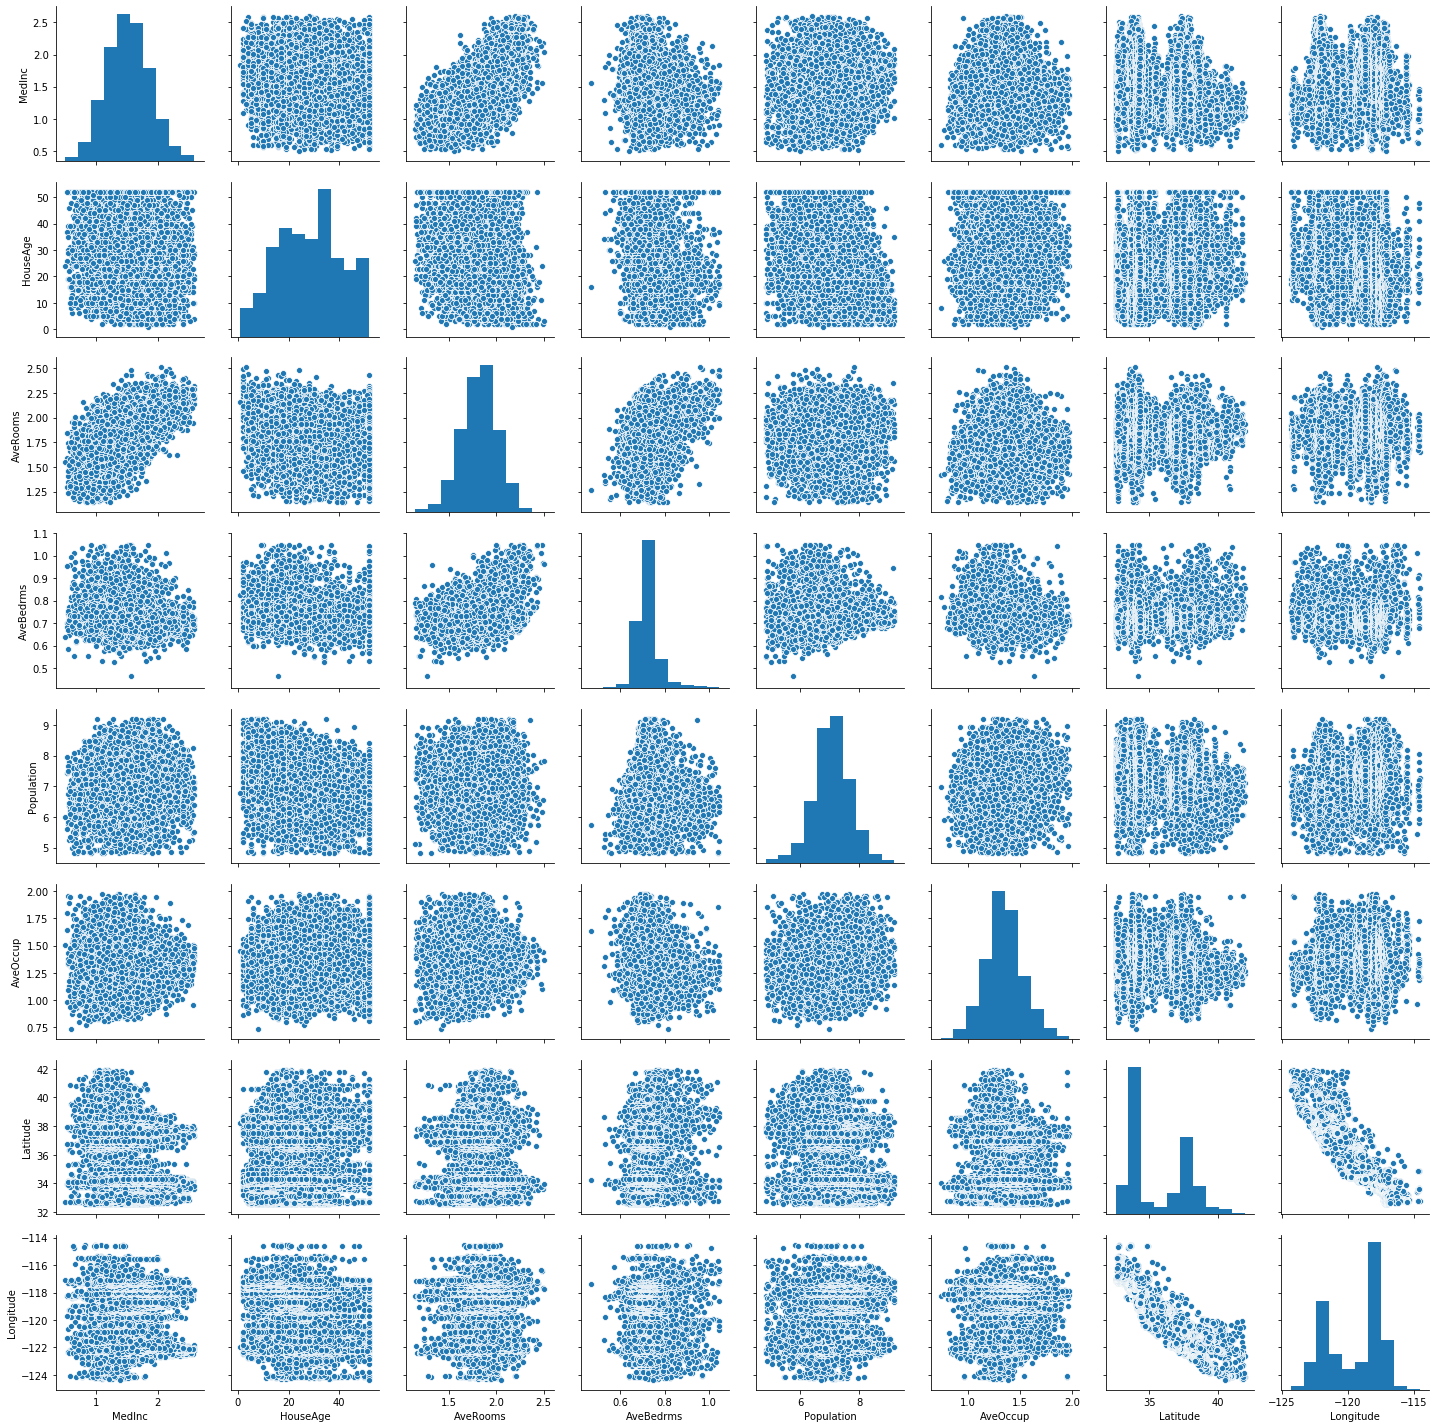

In [19]:
sns.pairplot(df_final)

# TRAIN AND TEST DATA

In [20]:
df_x=df_final.iloc[:,1:]
print(df_x)
y=df_final.iloc[:,0]
print(y)
print()
print(df_x.shape)
print(y.shape)

       HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0          41.0  2.077455   0.704982    5.777652  1.268511     37.88   
1          21.0  1.979364   0.678988    7.784057  1.134572     37.86   
2          52.0  2.228738   0.729212    6.208590  1.335596     37.85   
3          52.0  1.919471   0.729025    6.326149  1.266369     37.85   
4          52.0  1.985385   0.732888    6.338594  1.157342     37.85   
...         ...       ...        ...         ...       ...       ...   
20635      25.0  1.799307   0.757686    6.740519  1.269931     39.48   
20636      18.0  1.962070   0.839751    5.877736  1.416534     39.49   
20637      17.0  1.825443   0.751460    6.915723  1.201661     39.43   
20638      18.0  1.845223   0.775611    6.609349  1.138861     39.43   
20639      16.0  1.833336   0.771156    7.235619  1.285640     39.37   

       Longitude  
0        -122.23  
1        -122.22  
2        -122.24  
3        -122.25  
4        -122.25  
...          ...  
20

In [21]:
x=df_x

# TRAINING AND TESTING - VARIOUS MODELS

FUNCTION DECLARATION

In [22]:
def maxr2_score(regr,x,y):
    max_r_score=0
    for r_state in range(42,101):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.20)
        regr.fit(x_train,y_train)
        y_pred=regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        print("R2 Score corresponding to ",r_state," is ",r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print("Maximum R2 Score corresponds to ",final_r_state," is ",max_r_score)
    return(final_r_state)

LINEAR REGRESSION

In [23]:
lr=LinearRegression()
r_state=maxr2_score(lr,x,y)

R2 Score corresponding to  42  is  0.6708367124932852
R2 Score corresponding to  43  is  0.6672644219885335
R2 Score corresponding to  44  is  0.69217755721385
R2 Score corresponding to  45  is  0.6796248170893182
R2 Score corresponding to  46  is  0.6883609314492567
R2 Score corresponding to  47  is  0.6889591985054792
R2 Score corresponding to  48  is  0.6885127292138002
R2 Score corresponding to  49  is  0.6903060981976852
R2 Score corresponding to  50  is  0.6785969646470915
R2 Score corresponding to  51  is  0.6852730109181089
R2 Score corresponding to  52  is  0.6798374606455015
R2 Score corresponding to  53  is  0.6934388185601734
R2 Score corresponding to  54  is  0.6717734466147289
R2 Score corresponding to  55  is  0.6856877609106631
R2 Score corresponding to  56  is  0.6914051846290903
R2 Score corresponding to  57  is  0.6838767637076753
R2 Score corresponding to  58  is  0.6830991649954218
R2 Score corresponding to  59  is  0.6820334885574308
R2 Score corresponding to  60 

In [24]:
print("Mean R2 Score for Linear Regression is ",cross_val_score(linear_model.LinearRegression(),x,y,cv=5,scoring='r2').mean())
print("Standard Deviation in R2 Score for Linear Regression is ",cross_val_score(linear_model.LinearRegression(),x,y,cv=5,scoring='r2').std())

Mean R2 Score for Linear Regression is  0.6403887382096405
Standard Deviation in R2 Score for Linear Regression is  0.02924423957590382


KNEIGHBORS REGRESSOR

In [25]:
neighbors={"n_neighbors":range(1,30)}
knr=KNeighborsRegressor()
gknr=GridSearchCV(knr,neighbors,cv=5)
gknr.fit(x,y)
gknr.best_params_

{'n_neighbors': 7}

In [26]:
knr=KNeighborsRegressor(n_neighbors=7)
r_state=maxr2_score(knr,x,y)

R2 Score corresponding to  42  is  0.46438083261059926
R2 Score corresponding to  43  is  0.4669791926501794
R2 Score corresponding to  44  is  0.4661053902417627
R2 Score corresponding to  45  is  0.4722081211233595
R2 Score corresponding to  46  is  0.47719499257180364
R2 Score corresponding to  47  is  0.48494027812290585
R2 Score corresponding to  48  is  0.46926285149192704
R2 Score corresponding to  49  is  0.4850644557380539
R2 Score corresponding to  50  is  0.46229456494184673
R2 Score corresponding to  51  is  0.47357802580580555
R2 Score corresponding to  52  is  0.46584742543532875
R2 Score corresponding to  53  is  0.4908391851670769
R2 Score corresponding to  54  is  0.48043321080915125
R2 Score corresponding to  55  is  0.4909126611478234
R2 Score corresponding to  56  is  0.4789036968600551
R2 Score corresponding to  57  is  0.46706077035419014
R2 Score corresponding to  58  is  0.47576596544543104
R2 Score corresponding to  59  is  0.47517224321679075
R2 Score correspo

In [27]:
print("Mean R2 Score for KNN Regression is ",cross_val_score(knr,x,y,cv=5,scoring="r2").mean())
print("Standard Deviation in R2 Score for KNN Regression is ",cross_val_score(knr,x,y,cv=5,scoring='r2').std())

Mean R2 Score for KNN Regression is  0.23902213003252326
Standard Deviation in R2 Score for KNN Regression is  0.11201194503920968


LASSO REGRESSION

In [28]:
ls=Lasso()
parameters={"alpha":[0.001,0.01,0.1,1]}
clf=GridSearchCV(ls,parameters,cv=5)
clf.fit(x,y)
clf.best_params_

{'alpha': 0.001}

In [29]:
ls=Lasso(alpha=0.001)
r_state=maxr2_score(ls,x,y)

R2 Score corresponding to  42  is  0.664806198085246
R2 Score corresponding to  43  is  0.6619071111920476
R2 Score corresponding to  44  is  0.6884483078067583
R2 Score corresponding to  45  is  0.6745073424336185
R2 Score corresponding to  46  is  0.6806772738420492
R2 Score corresponding to  47  is  0.6859338162589288
R2 Score corresponding to  48  is  0.6827081601468983
R2 Score corresponding to  49  is  0.6863583921657199
R2 Score corresponding to  50  is  0.6751229480552763
R2 Score corresponding to  51  is  0.6782421002054029
R2 Score corresponding to  52  is  0.6763923871746613
R2 Score corresponding to  53  is  0.688150297817397
R2 Score corresponding to  54  is  0.6684932479372414
R2 Score corresponding to  55  is  0.6775767993342219
R2 Score corresponding to  56  is  0.6874682393803753
R2 Score corresponding to  57  is  0.6778182125169052
R2 Score corresponding to  58  is  0.6762380195098787
R2 Score corresponding to  59  is  0.6749774289599031
R2 Score corresponding to  60 

In [30]:
print("Mean R2 Score for Lasso Regression is ",cross_val_score(ls,x,y,cv=5,scoring="r2").mean())
print("Standard Deviation in R2 Score for Lasso Regression is ",cross_val_score(ls,x,y,cv=5,scoring="r2").std())

Mean R2 Score for Lasso Regression is  0.6370359850044032
Standard Deviation in R2 Score for Lasso Regression is  0.02290547437948921


RIDGE REGRESSION

In [31]:
rd=Ridge()
parameters={"alpha":[0.001,0.01,0.1,1]}
clf=GridSearchCV(rd,parameters,cv=5)
clf.fit(x,y)
clf.best_params_

{'alpha': 1}

In [32]:
rd=Ridge(alpha=1)
r_state=maxr2_score(rd,x,y)

R2 Score corresponding to  42  is  0.6706832970515678
R2 Score corresponding to  43  is  0.6671393731823726
R2 Score corresponding to  44  is  0.6922379375341656
R2 Score corresponding to  45  is  0.6795686188477201
R2 Score corresponding to  46  is  0.687954350347189
R2 Score corresponding to  47  is  0.6890539584833607
R2 Score corresponding to  48  is  0.6882795000684674
R2 Score corresponding to  49  is  0.6903393266096057
R2 Score corresponding to  50  is  0.6787282441748843
R2 Score corresponding to  51  is  0.684971477882701
R2 Score corresponding to  52  is  0.679912675762973
R2 Score corresponding to  53  is  0.6933719818921581
R2 Score corresponding to  54  is  0.6719056811655799
R2 Score corresponding to  55  is  0.6852741744424431
R2 Score corresponding to  56  is  0.6915161125972072
R2 Score corresponding to  57  is  0.6837198167194674
R2 Score corresponding to  58  is  0.6828165418134506
R2 Score corresponding to  59  is  0.6816813160243431
R2 Score corresponding to  60  

In [33]:
print("Mean R2 Score for Ridge Regression is ",cross_val_score(rd,x,y,cv=5,scoring="r2").mean())
print("Standard Deviation in R2 Score for Ridge Regression is ",cross_val_score(rd,x,y,cv=5,scoring="r2").std())

Mean R2 Score for Ridge Regression is  0.6405154608931996
Standard Deviation in R2 Score for Ridge Regression is  0.02852939422538321


ELASTIC NET REGRESSION

In [34]:
enr=ElasticNet()
parameters={"alpha":[0.001,0.01,0.1,1]}
clf=GridSearchCV(enr,parameters,cv=5)
clf.fit(x,y)
clf.best_params_

{'alpha': 0.001}

In [35]:
enr=ElasticNet(alpha=0.001)
r_state=maxr2_score(enr,x,y)

R2 Score corresponding to  42  is  0.6621363197343977
R2 Score corresponding to  43  is  0.6596767470256533
R2 Score corresponding to  44  is  0.6863511823305561
R2 Score corresponding to  45  is  0.6720882454852015
R2 Score corresponding to  46  is  0.6780623394282588
R2 Score corresponding to  47  is  0.6834548771852029
R2 Score corresponding to  48  is  0.6797274268121902
R2 Score corresponding to  49  is  0.684484718276491
R2 Score corresponding to  50  is  0.6728208386061738
R2 Score corresponding to  51  is  0.6751569399303279
R2 Score corresponding to  52  is  0.6743426239179656
R2 Score corresponding to  53  is  0.6857845887041043
R2 Score corresponding to  54  is  0.6659316158675093
R2 Score corresponding to  55  is  0.6748777304357534
R2 Score corresponding to  56  is  0.6854652669629144
R2 Score corresponding to  57  is  0.675118252586042
R2 Score corresponding to  58  is  0.6738142763019368
R2 Score corresponding to  59  is  0.6722082169691492
R2 Score corresponding to  60 

In [36]:
print("Mean R2 Score for Elastic Net Regression is ",cross_val_score(enr,x,y,cv=5,scoring="r2").mean())
print("Standard Deviation in R2 Score for Elastic Net Regression is ",cross_val_score(enr,x,y,cv=5,scoring="r2").std())

Mean R2 Score for Elastic Net Regression is  0.634689657208854
Standard Deviation in R2 Score for Elastic Net Regression is  0.022067542949194795


GRADIENT BOOSTING REGRESSOR

In [37]:
gbr=GradientBoostingRegressor()
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500,1000]}
clf=GridSearchCV(gbr,parameters,cv=5)
clf.fit(x,y)
clf.best_params_

{'learning_rate': 0.1, 'n_estimators': 500}

In [38]:
gbr=GradientBoostingRegressor(learning_rate=0.1,n_estimators=500)
r_state=maxr2_score(gbr,x,y)

R2 Score corresponding to  42  is  0.8107115654160026
R2 Score corresponding to  43  is  0.8059899509686055
R2 Score corresponding to  44  is  0.8191538850074532
R2 Score corresponding to  45  is  0.8124837910691431
R2 Score corresponding to  46  is  0.8124587254418096
R2 Score corresponding to  47  is  0.8164537992048171
R2 Score corresponding to  48  is  0.817996221932184
R2 Score corresponding to  49  is  0.8175163603796827
R2 Score corresponding to  50  is  0.8089543507132314
R2 Score corresponding to  51  is  0.8183184473948706
R2 Score corresponding to  52  is  0.81072120206784
R2 Score corresponding to  53  is  0.8179457828733199
R2 Score corresponding to  54  is  0.8156302789849816
R2 Score corresponding to  55  is  0.8210802609905102
R2 Score corresponding to  56  is  0.8212955817658661
R2 Score corresponding to  57  is  0.8185653999898514
R2 Score corresponding to  58  is  0.8201906394534347
R2 Score corresponding to  59  is  0.8088818103903225
R2 Score corresponding to  60  

In [39]:
print("Mean R2 Score for Gradient Boosting Regressor is ",cross_val_score(gbr,x,y,cv=5,scoring="r2").mean())
print("Standard Deviation in R2 Score for Gradient Boosting Regressor is ",cross_val_score(gbr,x,y,cv=5,scoring="r2").std())

Mean R2 Score for Gradient Boosting Regressor is  0.7070410559698621
Standard Deviation in R2 Score for Gradient Boosting Regressor is  0.055138751676540844


# BEST MODEL

R2 SCORE AND RMSE

In [40]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=73,test_size=0.20)
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
y_pred=gbr.predict(x_test)
print("R2 Score is ",r2_score(y_test,y_pred))
print("RMSE is ",np.sqrt(mean_squared_error(y_test,y_pred)))

R2 Score is  0.7798516555872931
RMSE is  0.16413699018237998


CROSS VALIDATION

In [41]:
score=cross_val_score(gbr,x,y,cv=5)
print('Score is ',score)
print('Mean Score is ', score.mean())
print('Standard Deviation is ',score.std())

Score is  [0.70948949 0.6897533  0.6987538  0.63020573 0.71181179]
Mean Score is  0.6880028232878413
Standard Deviation is  0.029958958077984554


# PICKLE

In [42]:
joblib.dump(gbr,'california.pkl')

['california.pkl']